In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import keras
from keras import layers, models, metrics, backend as K, optimizers
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('./train/train_data.csv', encoding='cp949')
test_data = pd.read_csv('./test/test_data.csv', encoding='cp949')

NameError: name 'pd' is not defined

In [199]:
Y = train_data[['2month', 'month', 'retained', 'week']].values
x_train_data = train_data.drop(columns=['2month', 'month', 'retained', 'week', 'acc_id'])
X = x_train_data.astype('float').values

In [200]:
test_acc_id = test_data[['acc_id']]
X_test = test_data.drop(columns=['acc_id'])

In [201]:
input_data = layers.Input(shape=(len(X[0]),))
x = layers.Dense((512), activation='relu')(input_data)
x = layers.Dropout(0.3)(x)
x = layers.Dense((512), activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense((512), activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_data = layers.Dense(len(Y[0]), activation='softmax')(x)

In [202]:
model = models.Model(inputs=input_data, outputs=output_data)

In [203]:
# Hyper Parameters 
epochs = 200
batch_size = 256

In [204]:
model.compile(optimizer=optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.5, min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
    EarlyStopping('val_loss', patience=20)# val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
]

hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2 )

Train on 55271 samples, validate on 13818 samples
Epoch 1/200
55271/55271 [==============================] - 1s 19us/step - loss: 0.4640 - acc: 0.7743 - val_loss: 0.4340 - val_acc: 0.7852
Epoch 2/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.4336 - acc: 0.7875 - val_loss: 0.4193 - val_acc: 0.7935
Epoch 3/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.4277 - acc: 0.7909 - val_loss: 0.4194 - val_acc: 0.7962
Epoch 4/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.4238 - acc: 0.7931 - val_loss: 0.4162 - val_acc: 0.7972
Epoch 5/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.4224 - acc: 0.7942 - val_loss: 0.4104 - val_acc: 0.7943
Epoch 6/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.4184 - acc: 0.7960 - val_loss: 0.4128 - val_acc: 0.7990
Epoch 7/200
55271/55271 [==============================] - 1s 16us/step - loss: 0.4177 - acc: 0.7972 - val_loss: 0.4086 - 

55271/55271 [==============================] - 1s 15us/step - loss: 0.3850 - acc: 0.8094 - val_loss: 0.3829 - val_acc: 0.8093
Epoch 116/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3851 - acc: 0.8092 - val_loss: 0.3834 - val_acc: 0.8093
Epoch 117/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3842 - acc: 0.8097 - val_loss: 0.3820 - val_acc: 0.8095
Epoch 118/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3846 - acc: 0.8097 - val_loss: 0.3830 - val_acc: 0.8093
Epoch 119/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3842 - acc: 0.8094 - val_loss: 0.3828 - val_acc: 0.8092
Epoch 120/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3846 - acc: 0.8095 - val_loss: 0.3821 - val_acc: 0.8088
Epoch 121/200
55271/55271 [==============================] - 1s 15us/step - loss: 0.3846 - acc: 0.8095 - val_loss: 0.3832 - val_acc: 0.8093
Epoch 122/200
55271/55271 [=======

In [119]:
Y_pred = model.predict(X_test, batch_size=1024)

In [120]:
# Submission Deep Learning (Dense)
submission = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission = pd.concat([test_acc_id, pd.DataFrame(submission, columns=['label'])], axis=1)
submission.to_csv('./submission.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [121]:
submission

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,week
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,retained
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


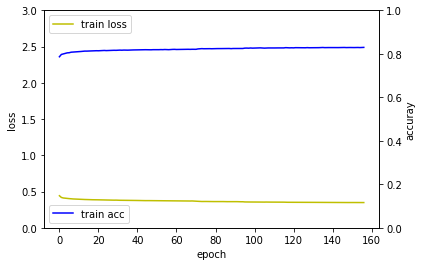

In [62]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [70]:
# Submission1 Random Forest Classifier

forest = RandomForestClassifier(n_estimators = 700, n_jobs = -1, max_depth = 10)
%time forest = forest.fit(X, Y)
Y_pred = forest.predict(X_test)

CPU times: user 3min 17s, sys: 131 ms, total: 3min 17s
Wall time: 25.3 s


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [71]:
submission1 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission1 = pd.concat([test_acc_id, pd.DataFrame(submission1, columns=['label'])], axis=1)
submission1.to_csv('./submission1.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
submission1

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,retained
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,2month


In [73]:
pd.merge(submission, submission1, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,week,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,retained,retained
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained,2month


In [155]:
# Submission2 KNN

neigh = KNeighborsClassifier(n_neighbors=3)
%time neigh = neigh.fit(X, Y)
Y_pred = neigh.predict(X_test)

CPU times: user 321 ms, sys: 0 ns, total: 321 ms
Wall time: 317 ms


In [156]:
neigh.score(X, Y)

0.7348551966954701

In [143]:
submission2 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission2 = pd.concat([test_acc_id, pd.DataFrame(submission2, columns=['label'])], axis=1)
submission2.to_csv('./submission2.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
submission2

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,retained
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


In [145]:
pd.merge(submission1, submission2, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,retained,retained
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,2month,retained
